<a href="https://colab.research.google.com/github/KushangShah/ML-Project-End-to-End-Machine-Learning./blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Stock Closing Price Prediction




##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name -**          Kushang Shah

# **Project Summary -**

Yes Bank is a well-known bank in the Indian financial domain.<br> <br>
<p align='left'>
Since 2018, it has been in the news because of the fraud case involving **Rana Kapoor**. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month.<br>
I will be analyzing the patterns of the dataset by performing exploratory data analysis and try to build a model with the help of machine learning for **predicting the closing stock price**.<br>
The tools for data analysis and model building used in this project are the packages from Python library such as Numpy and Pandas, Matplotlib , Seaborn, Linear Regression, lasso,ridge, ElasticNet,Minmaxscaler etc.
</p>



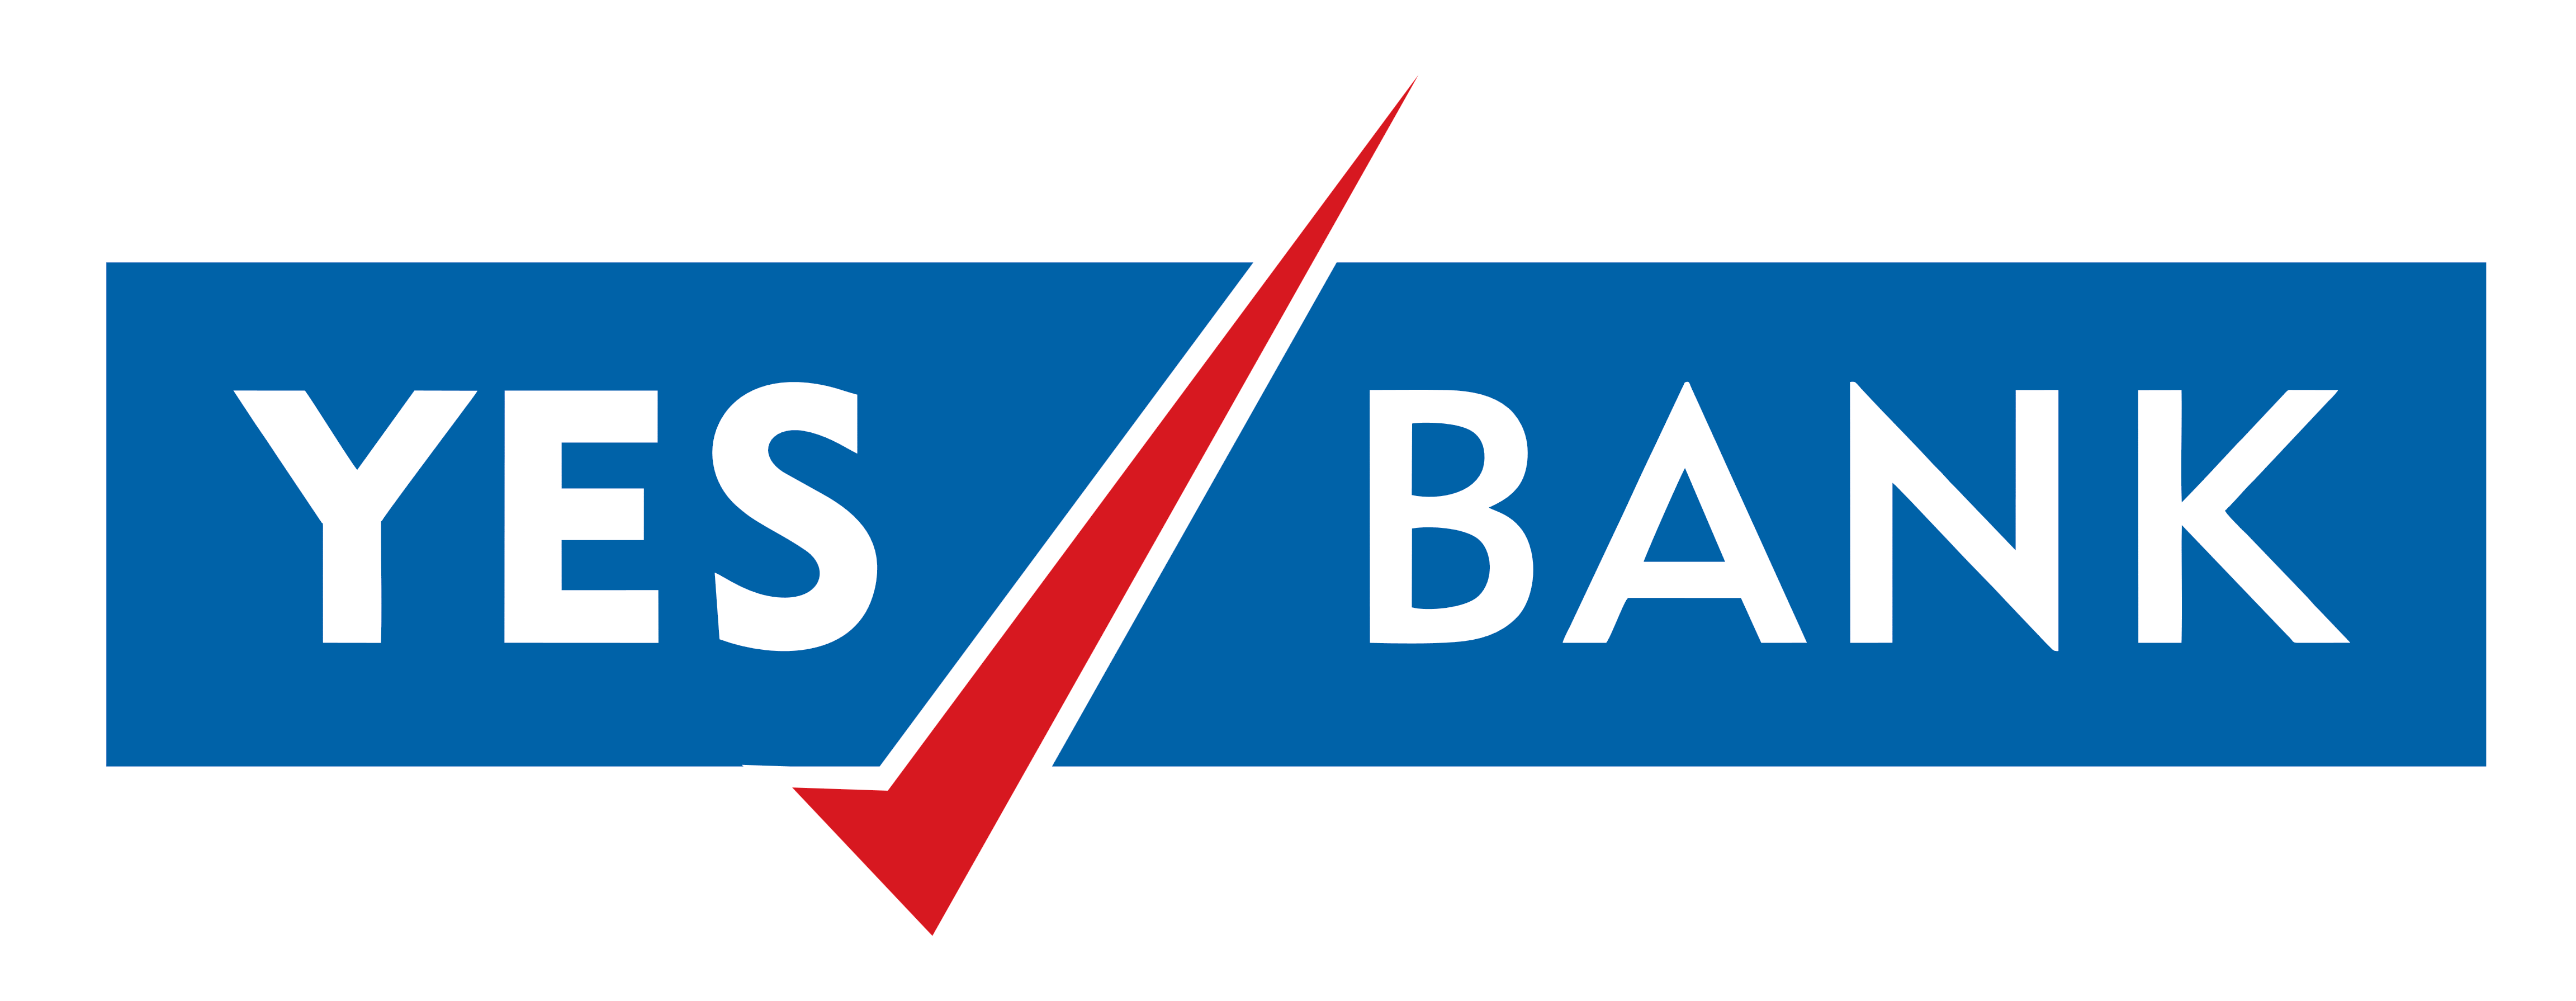

# **GitHub Link -**

## [Project link](https://github.com/KushangShah/ML-Project-End-to-End-Machine-Learning.)

## [Profile link](https://github.com/KushangShah/)

# **Problem Statement**


The given data set contains stock price information in the various columns by monthly date. There are 5 columns in the data set such as date, open, high, low, and closing price. The target variable here is the closing price column, which we will try to predict for the future.

To start, we will perform exploratory data analysis on the data. This involves analyzing the data to find patterns and understand the relationships between the various columns and the target variable column. By doing this, we can gain insights into the data and identify important factors that may influence the closing price.

Once we have a good understanding of the data, we will proceed to build a model. The model will enable us to predict or provide a decent estimate of the closing price, which is our target variable. This prediction will be based on the patterns and relationships identified during the exploratory data analysis.

Overall, the goal is to use the information in the dataset to create a model that can accurately predict the closing price, thereby assisting in making informed decisions related to stock trading and investment.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
# from numpy import math
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import (Lasso, Ridge, ElasticNet)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import (mean_squared_error, mean_absolute_percentage_error, mean_absolute_error)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# detting csv file
yes_bank_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cohort Paris/ML/CSV/data_YesBank_StockPrices.csv")

### Dataset First View

In [4]:
# Dataset First Look
yes_bank_df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
yes_bank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [6]:
# Dataset number of rows and columns
yes_bank_df.shape

(185, 5)

### Dataset Information

In [7]:
# Dataset Info
yes_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
duplicate = yes_bank_df[yes_bank_df.duplicated()].count()
duplicate

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
yes_bank_df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [10]:
# Visualizing the missing values

# No missing found


### What did you know about your dataset?

The dataset consists of 185 rows and 5 columns with various types of variables. There are no missing values or duplicate entries in the dataset. The columns contain two types of information: float and object. The dataset provides an overview of stock price details, and the goal is to analyze the relationship between the target variable (Closing price) and the independent variables in the other 4 columns. Subsequently, machine learning algorithm models will be built to predict or estimate future closing prices based on the insights generated from the data.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
yes_bank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [12]:
# Dataset Describe
yes_bank_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

The data set includes the following individual variables and their descriptions:

1. Date: This categorical variable represents the month and day on which the stock price information was recorded.

2. Open: This numeric variable indicates the opening stock price for a given date.

3. High: This numeric variable represents the highest stock price reached on a given date.

4. Low: This numeric variable denotes the lowest stock price recorded on a given date.

5. Close: This numeric variable signifies the closing stock price for a given date.

These variables provide important information about the stock prices and their fluctuations over time, which can be useful for analysis and decision-making in the financial domain.

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for columns in yes_bank_df:
  unique_columns = yes_bank_df[columns].unique()
  print(f"\nUnique value in {columns}:\n{unique_columns}")


Unique value in Date:
['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 'Mar-14' 'Apr-14' 'May-14' 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Copying the dataSet so I wouldn't messed up the original dataset
yes_bank_df_2 = yes_bank_df.copy()

In [15]:
# Write your code to make your dataset analysis ready.
yes_bank_df_2['Date'] = pd.to_datetime(yes_bank_df_2['Date'].apply(lambda x: datetime.strptime(x, "%b-%y")))

In [16]:
# Extending Year and Month from date
yes_bank_df_2['Year'] = yes_bank_df_2['Date'].dt.year
yes_bank_df_2['Month'] = yes_bank_df_2['Date'].dt.month

In [17]:
# Checking the new data frame
yes_bank_df_2.head()

,Date,Open,High,Low,Close,Year,Month
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11


### What all manipulations have you done and insights you found?

The given data set has been thoroughly checked and confirmed to be free of missing values, null values, and duplicate values. Additionally, the 'Date' column has been reformatted into the standard Year-month-date format to facilitate better visualization and analysis of the data. This ensures that the data is clean and well-prepared for further processing and interpretation.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

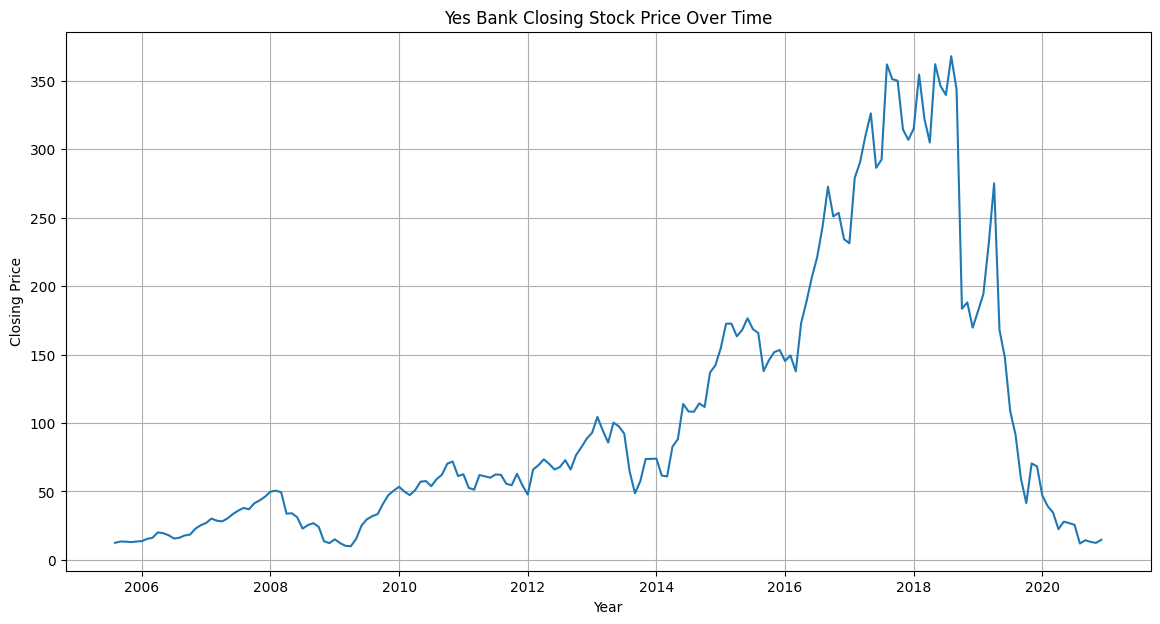

In [18]:
# Chart - 1 visualization code
# Line plot of closing price over time
plt.figure(figsize=(14, 7))
plt.plot(yes_bank_df_2['Year'] + yes_bank_df_2['Month']/12, yes_bank_df_2['Close'])

plt.title('Yes Bank Closing Stock Price Over Time')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.grid(True)

plt.show()

##### 1. Why did you pick the specific chart?

The line plot was chosen to visualize the trend of the closing stock price over time. It helps in understanding how the stock price has changed month-to-month and year-to-year.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals fluctuations and trends in the stock price over time, highlighting periods of significant growth or decline. It can show overall trends such as steady growth, periods of volatility, or major drops, which can be correlated with significant events in the bank's history.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help in several ways:

 - Positive Impact: Identifying periods of growth can help in understanding the factors that contributed to the positive performance, allowing replication of such strategies in the future.<br>

 - Negative Growth: The chart can also reveal periods of sharp declines. Understanding these declines can help in mitigating similar risks in the future. For example, a significant drop might correlate with the fraud case involving *Rana Kapoor*, highlighting the importance of corporate governance and transparency.

#### Chart - 2

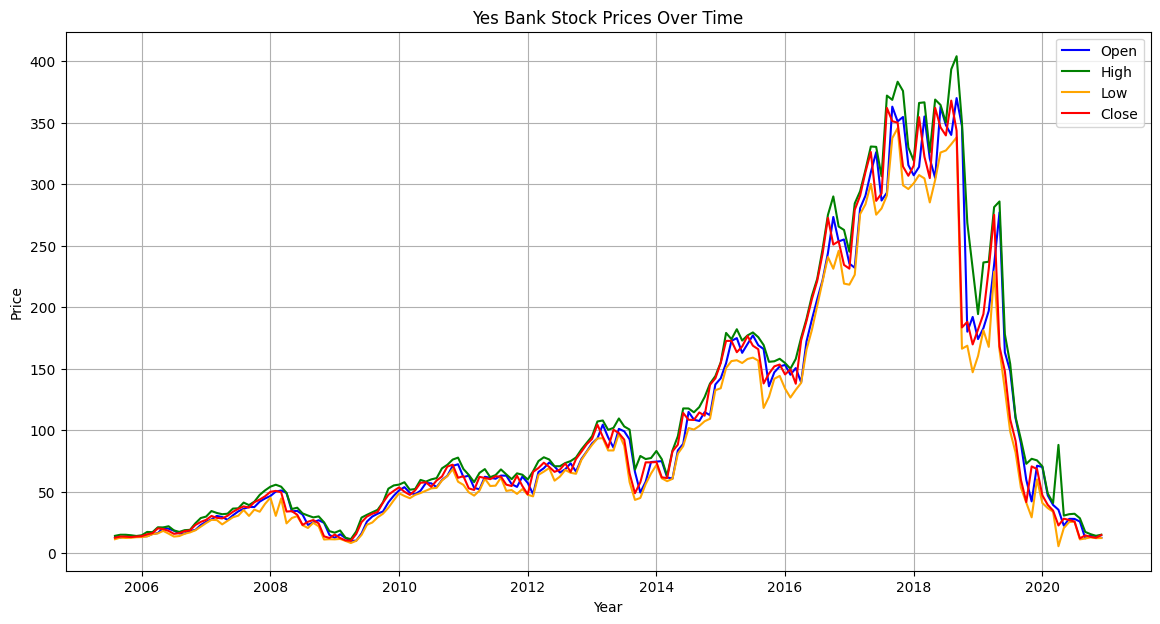

In [19]:
# Chart - 2 visualization code
# Line Plot of Open, High, Low, and Close Prices Over Time
plt.figure(figsize=(14, 7))

plt.plot(yes_bank_df_2['Year'] + yes_bank_df_2['Month']/12, yes_bank_df_2['Open'], label='Open', color='blue')
plt.plot(yes_bank_df_2['Year'] + yes_bank_df_2['Month']/12, yes_bank_df_2['High'], label='High', color='green')
plt.plot(yes_bank_df_2['Year'] + yes_bank_df_2['Month']/12, yes_bank_df_2['Low'], label='Low', color='orange')
plt.plot(yes_bank_df_2['Year'] + yes_bank_df_2['Month']/12, yes_bank_df_2['Close'], label='Close', color='red')

plt.title('Yes Bank Stock Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

##### 1. Why did you pick the specific chart?

The line plot for Open, High, Low, and Close prices over time was chosen to provide a comprehensive view of the stock price movements. This chart allows us to see how these four key metrics interact and vary over time.

##### 2. What is/are the insight(s) found from the chart?

*   The chart shows the overall trend and range of stock prices, indicating periods of high volatility and stability.
*   It highlights how the closing price compares to the opening price within each month, and how the high and low prices fluctuate.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can be valuable for several reasons:

- Positive Impact: By understanding the volatility and price movements, investors can make more informed decisions regarding entry and exit points for trading the stock.

- Negative Growth: Periods where the stock price shows significant volatility may indicate underlying issues or market reactions to negative news. Recognizing these patterns can help the bank to address the causes and manage investor relations better.

#### Chart - 3

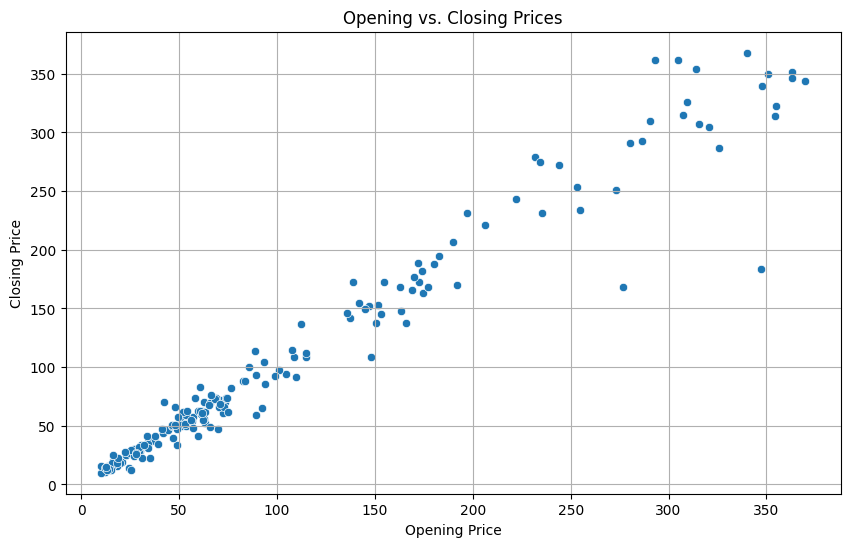

In [20]:
# Chart - 3 visualization code
# Scater plot of opening VS closing price
plt.figure(figsize=(10, 6))
# sns.set(style="whitegrid")
sns.scatterplot(x='Open', y='Close', data=yes_bank_df_2,)

plt.title('Opening vs. Closing Prices')
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.grid(True)

plt.show()

##### 1. Why did you pick the specific chart?

The scatter plot was chosen to visualize the relationship between the opening and closing prices. It helps in identifying how the stock's opening price correlates with its closing price on a monthly basis.

##### 2. What is/are the insight(s) found from the chart?



*   The scatter plot reveals the degree of correlation between opening and closing prices. A strong positive correlation would indicate that the stock often closes near its opening price, while a weaker correlation could indicate more significant daily fluctuations.

*   It can also highlight any outliers where the closing price is significantly different from the opening price, suggesting high volatility or market reactions during the trading period.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can be beneficial:

- Positive Impact: Understanding the correlation between opening and closing prices can help traders and investors predict closing prices based on the opening price, aiding in more informed trading decisions.

- Negative Growth: If there are significant discrepancies between opening and closing prices frequently, it may indicate market instability or external factors influencing the stock's volatility. Identifying these patterns can help the bank in mitigating factors causing such fluctuations.

#### Chart - 4

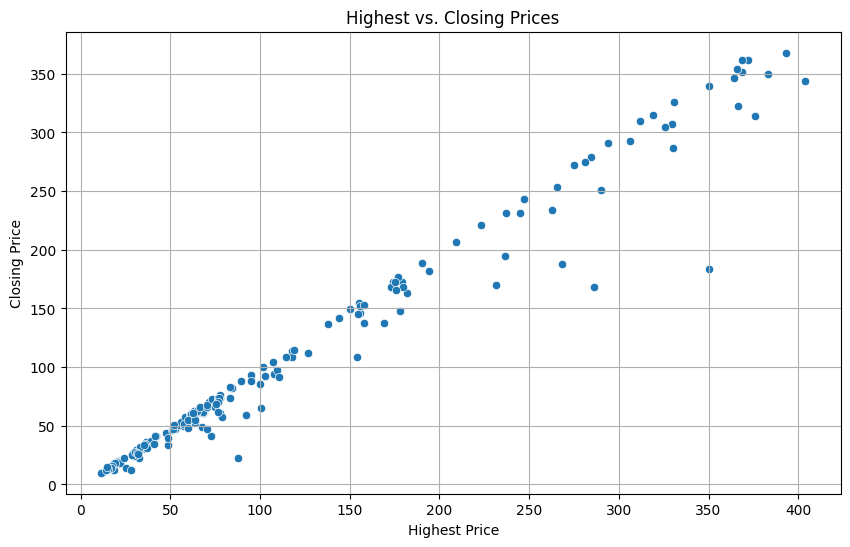

In [21]:
# Chart - 4 visualization code
# Scatter Plot of Highest vs. Closing Prices
plt.figure(figsize=(10, 6))

sns.scatterplot(x='High', y='Close', data=yes_bank_df_2)

plt.title('Highest vs. Closing Prices')
plt.xlabel('Highest Price')
plt.ylabel('Closing Price')
plt.grid(True)

plt.show()

##### 1. Why did you pick the specific chart?

The scatter plot was selected to visualize the relationship between the highest and closing prices. It allows us to examine how the highest price of the day correlates with the closing price, indicating intraday price movements.

##### 2. What is/are the insight(s) found from the chart?



*   The scatter plot reveals the degree of correlation between the highest and closing prices. A strong positive correlation suggests that the closing price tends to be closer to the highest price of the day, indicating bullish market sentiment.

*   Conversely, a weaker correlation may indicate instances where the closing price is significantly lower than the highest price, signaling potential profit-taking or bearish market sentiment.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can be valuable:

- Positive Impact: Understanding the relationship between the highest and closing prices can help traders and investors gauge market sentiment and identify potential buying or selling opportunities.

- Negative Growth: Significant deviations between the highest and closing prices may indicate market volatility or manipulation, which could lead to increased investor uncertainty and potential negative impacts on the stock's performance.

#### Chart - 5

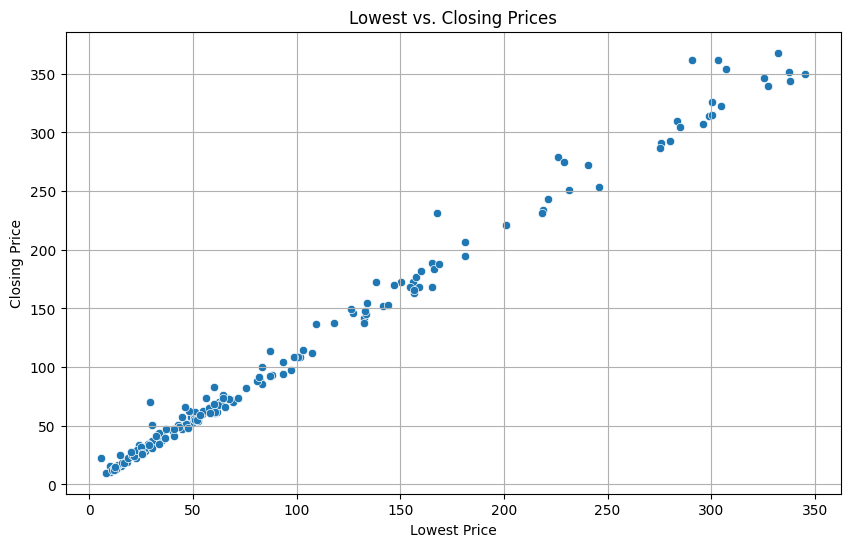

In [22]:

# Chart - 5 visualization code
# Scatter Plot of Lowest vs. Closing Prices
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Low', y='Close', data=yes_bank_df_2)

plt.title('Lowest vs. Closing Prices')
plt.xlabel('Lowest Price')
plt.ylabel('Closing Price')
plt.grid(True)

plt.show()

##### 1. Why did you pick the specific chart?

The scatter plot was chosen to visualize the relationship between the lowest and closing prices. It helps in understanding how the lowest price of the day correlates with the closing price, providing insights into intraday price movements.

##### 2. What is/are the insight(s) found from the chart?



*   The scatter plot reveals the degree of correlation between the lowest and closing prices. A strong positive correlation suggests that the closing price tends to be closer to the lowest price of the day, indicating bearish market sentiment.

*   Conversely, a weaker correlation may indicate instances where the closing price is significantly higher than the lowest price, suggesting potential buying interest or bullish market sentiment.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can be valuable:

- Positive Impact: Understanding the relationship between the lowest and closing prices can help traders and investors assess market sentiment and identify potential entry or exit points.

- Negative Growth: Significant discrepancies between the lowest and closing prices may indicate market volatility or manipulation, which could lead to increased investor uncertainty and potential negative impacts on the stock's performance.

#### Chart - 6

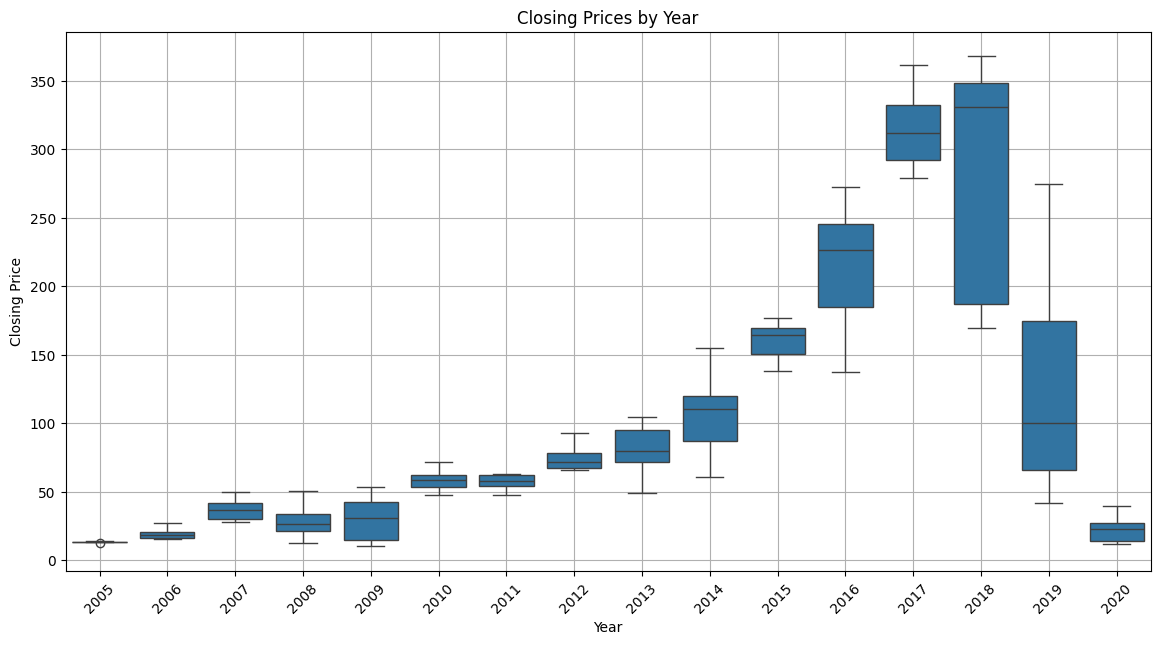

In [25]:
# Chart - 6 visualization code
# Box Plot of Closing Prices by Year
plt.figure(figsize=(14, 7))

sns.boxplot(x='Year', y='Close', data=yes_bank_df_2)

plt.title('Closing Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

##### 1. Why did you pick the specific chart?

The box plot was chosen to visualize the distribution of closing prices for each year. It provides a summary of the data's central tendency and variability, highlighting the median, quartiles, and potential outliers in the closing prices annually.

##### 2. What is/are the insight(s) found from the chart?



*   The box plot shows the range and distribution of closing prices for each year, highlighting trends, consistency, and variability over time.
*   It can identify years with high volatility (large interquartile ranges) or stability (smaller interquartile ranges).

*   Outliers can be easily spotted, indicating unusual spikes or drops in closing prices during specific years.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can be beneficial:

- Positive Impact: Understanding the annual distribution of closing prices helps in assessing the bank's stock performance over different years. This can aid in strategic planning and investment decisions by identifying stable and volatile periods.

- Negative Growth: Identifying years with high volatility or significant outliers can help in analyzing the underlying causes, such as economic events or internal issues, allowing for better risk management and corrective measures.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***